<a href="https://colab.research.google.com/github/YuehMintTai/000/blob/main/20211017Rpython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rpy2

In [3]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages('pROC')

In [4]:
%%R
myData<-read.csv('dep_result_df')
tail(myData,1)

        X real   predict 軍人 sex   age
4471 4470    1 0.3512212    0   2 29.25


R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases



  |======================================================================| 100%


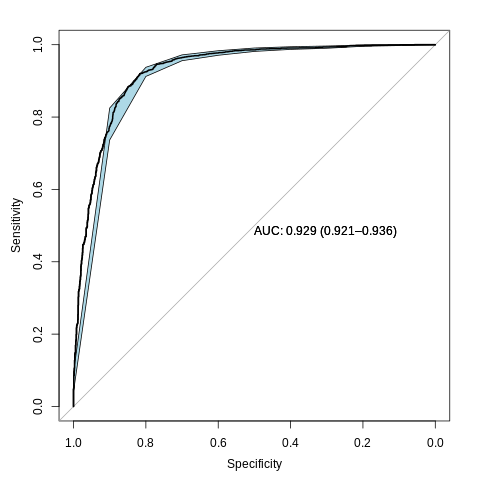

In [7]:
%%R
library(pROC)
pROC_obj<-roc(myData$real,myData$predict,smoothed=TRUE, print.auc=TRUE, ci=TRUE, ci.alpha=0.9, plot=TRUE)
myROC.ci<-ci.se(pROC_obj)
plot(myROC.ci, type='shape',col='lightblue')